In [2]:
#rollno:72 Quetion no:4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
url="/content/online_shoppers_intention.csv"
df=pd.read_csv(url)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#encoding
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)

In [4]:
df.dropna(inplace=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,False


In [5]:
#standardization,normalization
scaler = StandardScaler()
df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']] = scaler.fit_transform(df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']])


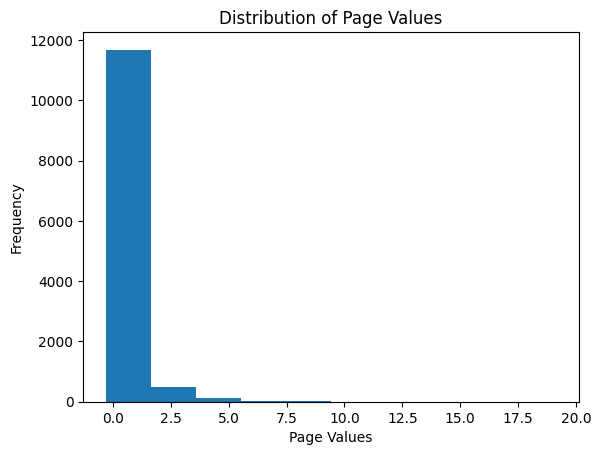

In [7]:
#(EDA)
plt.hist(df['PageValues'])
plt.xlabel('Page Values')
plt.ylabel('Frequency')
plt.title('Distribution of Page Values')
plt.show()


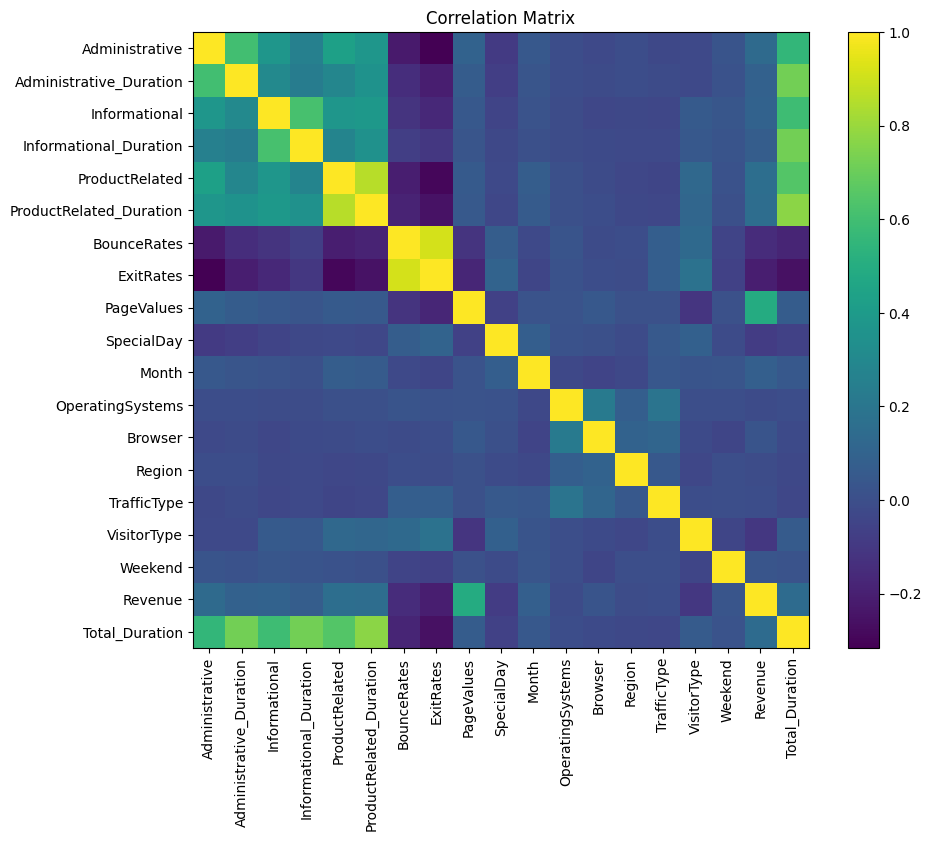

In [8]:
# Explore correlations
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

In [9]:
#step 4-Feature engineering
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

In [10]:
#split
X = df.drop(columns=['Revenue'])
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#train
lr_model = LogisticRegression()
mlp_model = MLPClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()
nb_model = GaussianNB()

lr_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GaussianNB()

In [12]:
#test
lr_pred = lr_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
nb_pred = nb_model.predict(X_test)


In [13]:
#accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("MLP Accuracy:", accuracy_score(y_test, mlp_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Logistic Regression Accuracy: 0.8690186536901865
MLP Accuracy: 0.8824006488240065
KNN Accuracy: 0.862124898621249
SVM Accuracy: 0.8751013787510138
Naive Bayes Accuracy: 0.8004866180048662


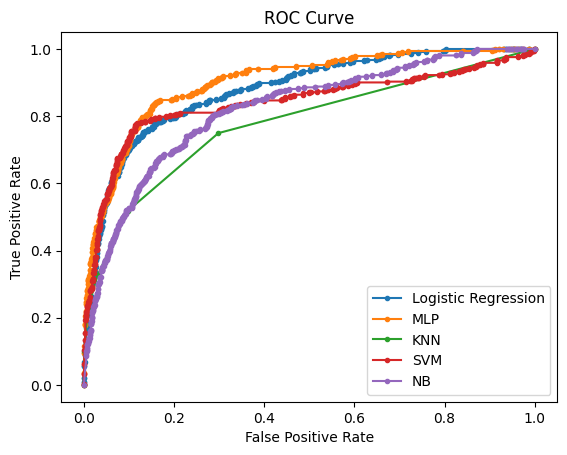

In [16]:
#roc
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_probs = svm_model.predict_proba(X_test)

lr_probs = lr_model.predict_proba(X_test)[:,1]
mlp_probs = mlp_model.predict_proba(X_test)[:,1]
knn_probs = knn_model.predict_proba(X_test)[:,1]
svm_probs = svm_model.predict_proba(X_test)[:,1]
nb_probs = nb_model.predict_proba(X_test)[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)


plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.plot(nb_fpr, nb_tpr, marker='.', label='NB')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [17]:

X_cluster = df.drop(columns=['Revenue'])
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_cluster)

# Measure the performance of the clustering model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)